# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [23]:
data=pd.read_csv("Position_Salaries.csv")

Checking for null values

In [24]:
print(data.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [25]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [26]:
print(data.size)

30


Dividing dataset into dependent and independent data

In [27]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

We don't need to do the spliting here because we have vary less data which is 10 rows only.


# Preparing Polynomial Regression model...

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=9)
X1=pf.fit_transform(X)
Lr=LinearRegression()
Lr.fit(X1,Y)

LinearRegression()

Predicting the test data by using Regression model

In [29]:
y_pred=Lr.predict(X1)

Comparing the original and predicted data.....

In [30]:
print(np.concatenate((Y.reshape(len(Y),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[  45000.           44999.95524136]
 [  50000.           50000.00570684]
 [  60000.           60000.01207874]
 [  80000.           79999.99142668]
 [ 110000.          110000.02227248]
 [ 150000.          149999.99920151]
 [ 200000.          200000.01396641]
 [ 300000.          300000.00429198]
 [ 500000.          499999.92400357]
 [1000000.         1000000.07181498]]


Predicting random_data....

In [31]:
print(Lr.predict(pf.transform([[8.5]])))

[384532.34603092]


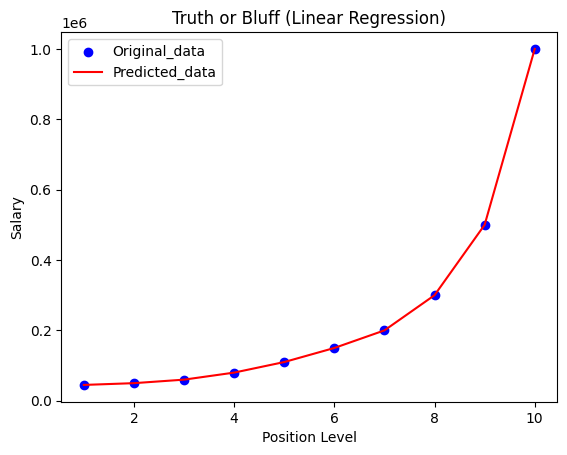

In [32]:
plt.scatter(X,Y,color="blue",label="Original_data")
plt.plot(X,y_pred,color="red",label="Predicted_data")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import r2_score
print(r2_score(Y,y_pred))

0.9999999999999828
